In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm



In [3]:
df = pd.read_csv("loan_data.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(381, 13)

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
376    360.0
377    360.0
378    360.0
379    180.0
380    360.0
Name: Loan_Amount_Term, Length: 381, dtype: float64

In [9]:
df['Credit_History'].fillna(df['Credit_History'].mean())

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
376    1.0
377    1.0
378    1.0
379    1.0
380    0.0
Name: Credit_History, Length: 381, dtype: float64

In [10]:
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [11]:
df.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)

C:\Users\LIONESS\AppData\Local\Temp\ipykernel_1088\878605854.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)


In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [13]:
df['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [14]:
df.replace({"Dependents":{'3+':4}}, inplace=True)

In [15]:
df['Dependents'].value_counts()

Dependents
0    234
2     59
1     52
4     28
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

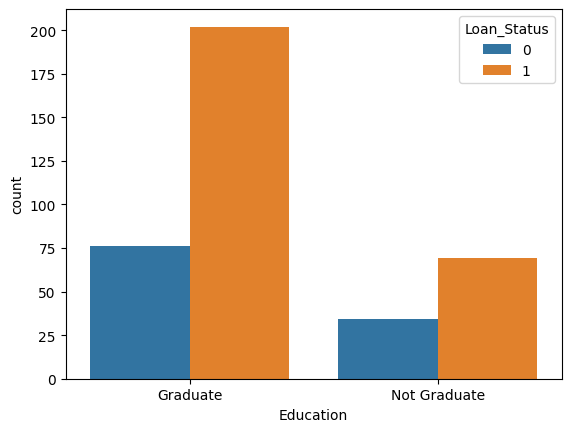

In [16]:
sns.countplot(x='Education', hue='Loan_Status', data=df)

<Axes: xlabel='Married', ylabel='count'>

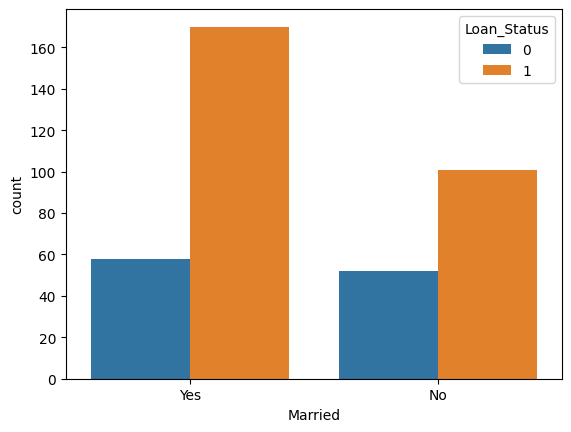

In [17]:
sns.countplot(x='Married', hue='Loan_Status', data=df)

<Axes: xlabel='Gender', ylabel='count'>

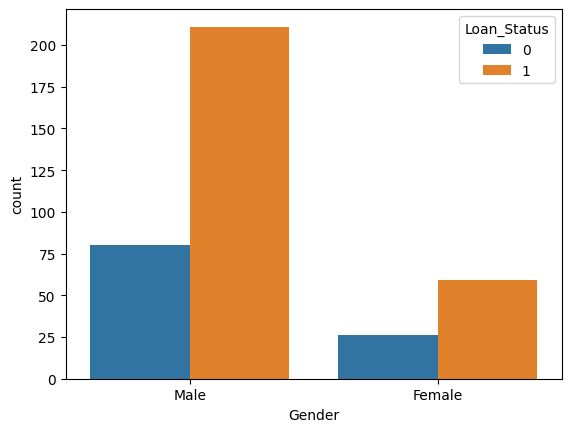

In [18]:
sns.countplot(x='Gender', hue='Loan_Status', data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

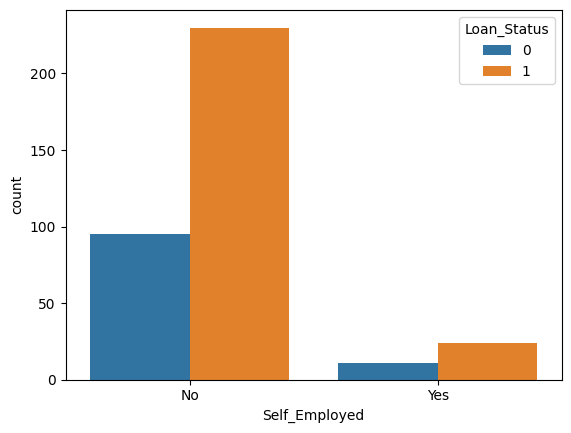

In [19]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

In [20]:
df.replace({"Married":{'Yes':1, 'No':0}, 'Gender':{'Male':1, 'Female':0}, 'Self_Employed':{'Yes':1, 'No':0}, 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)

C:\Users\LIONESS\AppData\Local\Temp\ipykernel_1088\2256714581.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Married":{'Yes':1, 'No':0}, 'Gender':{'Male':1, 'Female':0}, 'Self_Employed':{'Yes':1, 'No':0}, 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2}, 'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)


In [21]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1.0,1,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1.0,1,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1.0,1,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1.0,0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1.0,1,0,0,0.0,2333,1516.0,95.0,360.0,1.0,2,1


In [22]:
df = df.dropna()

In [23]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = df['Loan_Status']

In [25]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0        1          1          1            0.0             4583   
1       1.0        1          0          1            1.0             3000   
2       1.0        1          0          0            0.0             2583   
3       1.0        0          0          1            0.0             6000   
4       1.0        1          0          0            0.0             2333   
..      ...      ...        ...        ...            ...              ...   
376     1.0        1          4          1            0.0             5703   
377     1.0        1          0          1            0.0             3232   
378     0.0        0          0          1            0.0             2900   
379     1.0        1          4          1            0.0             4106   
380     0.0        0          0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(308, 11) (277, 11) (31, 11)


In [28]:
classifier = svm.SVC(kernel='linear')

In [29]:
classifier.fit(X_train,Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [30]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [31]:
print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  0.8267148014440433


In [32]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [33]:
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on test data:  0.8064516129032258


In [36]:
X_new = (1.0, 1, 0, 0, 0.0, 2583, 2358.0, 120.0, 360.0, 1.0, 1)

input_data_as_numpy_array = np.asarray(X_new)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
    print("The loan is not approved")
else:
    print("The news is approved")

[1]
The news is approved


c:\Users\LIONESS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
